In [1]:
import pandas as pd
from graphing_functions import *
from utils import *


In [21]:
experiment_name = "2-by-4-PE-experiment"

eyerissv2_pe_config_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/design/SI-SW.yaml"
)

eyerissv2_pe_arch_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/design/arch.yaml"
)
eyerissv2_pe_component_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/design/compound_components.yaml"
)
mobilenet_sparse_dir = os.path.join(
    os.getcwd(),
    'workloads/mobilenet0.5-sparse/uniform'
)
mobilenet_sparse_mappings_dir = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapping/original-derived-mapping"
)
mobilenet_computed_sparse_mappings_dir = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapping/searched-mapping"
)


workload_file_array = get_all_files_in_dir(mobilenet_sparse_dir)
mapping_file_array = get_all_files_in_dir(mobilenet_sparse_mappings_dir)
computed_mapping_file_array = get_all_files_in_dir(mobilenet_computed_sparse_mappings_dir)

print(workload_file_array)

['/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L13.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L19.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L21.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L23.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L25.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L27.yaml']


In [3]:
run_accelergy(
    arch=eyerissv2_pe_arch_file,
    components=eyerissv2_pe_component_file
)

    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/local/share/accelergy/primitive_component_libs'], 'table_plug_ins': {'roots': ['/usr/local/share/accelergy/estimation_plug_ins/accelergy-table-based-plug-ins/set_of_table_templates']}}
Info: Parsing file /home/wo

In [4]:
experiment_ertart_dir = f"{experiment_name}/ert_art/"
shutil.copy("ART.yaml", experiment_ertart_dir)
shutil.copy("ART_summary.yaml", experiment_ertart_dir)
shutil.copy("ERT.yaml", experiment_ertart_dir)
shutil.copy("ERT_summary.yaml", experiment_ertart_dir)


'2-by-4-PE-experiment/ert_art/ERT_summary.yaml'

In [5]:
eyerissv2_pe_art_file = os.path.join(
    os.getcwd(),
    experiment_ertart_dir + "ART.yaml"
)
eyerissv2_pe_ert_file = os.path.join(
    os.getcwd(),
    experiment_ertart_dir + "ERT.yaml"
)

In [6]:
mapper_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapper/mapper.yaml"
)
constraints_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapper/constraints.yaml"
)

for workload_file in workload_file_array:
    print(workload_file)
    run_timeloop_mapper(
        arch    = eyerissv2_pe_arch_file,
        problem = workload_file, 
        mapper  = mapper_file,
        pe_art  = eyerissv2_pe_art_file,
        pe_ert  = eyerissv2_pe_ert_file,
        config  = eyerissv2_pe_config_file,
        constraints = constraints_file
    )
    workload_file_name = workload_file.strip().split('/')[-1].strip('.yaml')
    print(workload_file_name)
    mv_cmd_stat = ['mv','timeloop-mapper.stats.txt',f"{experiment_name}/mapping/searched-mapping/{workload_file_name}-timeloop-mapper.stats.txt"]
    print(' '.join(mv_cmd_stat))    
#     status = subprocess.call(mv_cmd_stat) 
    mv_cmd_map = ['mv','timeloop-mapper.map.yaml',f"{experiment_name}/mapping/searched-mapping/{workload_file_name}-timeloop-mapper.map.yaml"]
    print(' '.join(mv_cmd_map))    
    status = subprocess.call(mv_cmd_map) 


/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using all available hardware threads = 16
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension R = 1
  Factorization options along problem dimension S = 1
  Factorization options along problem dimension E = 1
  Factorization options along problem dimension F = 1
  Factorization options along problem dimens

[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.793 | pJ/Compute =   94.288 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   43.444 | pJ/Compute =  114.440 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   43.747 | pJ/Compute =  115.238 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 11] Utilization = 0.12 | pJ/Algorithmic-Compute =   33.780 | pJ/Compute =   88.984 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] C4 - L1[O] G1 - L0[I] M32 
[  7] Utilization = 1.00 | pJ/Algorithmic-Compute =   39.702 | pJ/Compute =  104.583 | L4[WIO] M2 C2 F32 E32 C2Y M4X - L3[I] M2 C4 - L2[W] C4 - L1[O] G1 - L0[I] M4 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.453 | pJ/Compute =  177.686 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  9] Utilization = 0.50 | pJ/Algori

[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   17.080 | pJ/Compute =   44.992 | L4[WIO] C8 F32 E32 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] C2 - L0[I] M16 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   17.224 | pJ/Compute =   45.371 | L4[WIO] C8 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =   10.277 | pJ/Compute =   27.072 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.657 | pJ/Compute =   96.563 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.472 | pJ/Compute =   98.708 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.657 | pJ/Compute =   96.563 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithm



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    5.184 | pJ/Compute =   13.655
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L07
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L07-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L07-timeloop-mapper.map.yaml
/home/workspace

[  6] Utilization = 0.12 | pJ/Algorithmic-Compute =  184.556 | pJ/Compute =  261.672 | L4[WIO] M4 C64 F16 E16 - L3[I] M8 - L2[W] M4 - L1[O] G1 - L0[I] G1 
[ 12] Utilization = 0.50 | pJ/Algorithmic-Compute =   61.617 | pJ/Compute =   87.364 | L4[WIO] M64 C16 F16 E16 C4X - L3[I] G1 - L2[W] M2 - L1[O] G1 - L0[I] G1 
[  7] Utilization = 0.12 | pJ/Algorithmic-Compute =  210.612 | pJ/Compute =  298.614 | L4[WIO] M64 C16 F16 E16 - L3[I] C4 - L2[W] M2 - L1[O] G1 - L0[I] G1 
[ 14] Utilization = 0.50 | pJ/Algorithmic-Compute =   61.320 | pJ/Compute =   86.943 | L4[WIO] M128 C2 F16 E16 C4X - L3[I] G1 - L2[W] G1 - L1[O] C8 - L0[I] G1 
[  0] Utilization = 1.00 | pJ/Algorithmic-Compute =   34.702 | pJ/Compute =   49.202 | L4[WIO] M2 C16 F16 E16 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] G1 - L0[I] M16 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =   87.235 | pJ/Compute =  123.686 | L4[WIO] C16 F16 E16 C4X - L3[I] M2 - L2[W] M4 - L1[O] M2 - L0[I] M8 
[ 10] Utilization = 0.50 | pJ/Algorithmic-Compute

[ 10] Utilization = 0.50 | pJ/Algorithmic-Compute =    8.704 | pJ/Compute =   12.341 | L4[WIO] M8 C2 F16 E16 C4X - L3[I] G1 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   59.096 | pJ/Compute =   83.789 | L4[WIO] M2 C2 F16 E16 M2Y C4X - L3[I] C4 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   33.799 | pJ/Compute =   47.922 | L4[WIO] M64 C2 F16 E16 M2Y C4X - L3[I] G1 - L2[W] C4 - L1[O] C2 - L0[I] G1 
[  9] Utilization = 0.50 | pJ/Algorithmic-Compute =    8.704 | pJ/Compute =   12.341 | L4[WIO] M8 C2 F16 E16 C4X - L3[I] G1 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[ 15] Utilization = 0.50 | pJ/Algorithmic-Compute =   19.225 | pJ/Compute =   27.258 | L4[WIO] M4 C8 F16 E16 C4X - L3[I] G1 - L2[W] C2 - L1[O] M8 - L0[I] M4 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   87.244 | pJ/Compute =  123.699 | L4[WIO] F16 E16 M2Y C4X - L3[I] M2 C16 - L2[W] M16 - L1[O] M2 - L0[I] G1 
[  8] Utilization = 0.50 | pJ/Algorit

[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 13] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  8] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 14] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.




Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.984 | pJ/Compute =    9.902
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L09
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L09-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L09-timeloop-mapper.map.yaml
/home/workspace

[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =   65.647 | pJ/Compute =  123.568 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[  6] Utilization = 0.25 | pJ/Algorithmic-Compute =   65.709 | pJ/Compute =  123.685 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] C4 - L2[W] G1 - L1[O] C2 - L0[I] M4 
[  4] Utilization = 0.50 | pJ/Algorithmic-Compute =  107.436 | pJ/Compute =  202.228 | L4[WIO] C4 F8 E8 M2Y C2X - L3[I] M16 C16 - L2[W] M2 - L1[O] M2 - L0[I] M2 
[  7] Utilization = 0.25 | pJ/Algorithmic-Compute =   65.709 | pJ/Compute =  123.685 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] C4 - L2[W] C2 - L1[O] G1 - L0[I] M4 
[ 10] Utilization = 0.25 | pJ/Algorithmic-Compute =  171.616 | pJ/Compute =  323.034 | L4[WIO] M2 C128 F8 E8 M2Y - L3[I] M2 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =   65.647 | pJ/Compute =  123.568 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] C2 - L2[W] C2 - L1[O] C2 - L0[I] M4 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compu

[ 10] Utilization = 0.50 | pJ/Algorithmic-Compute =   46.199 | pJ/Compute =   86.960 | L4[WIO] M8 C2 F8 E8 C4X - L3[I] M2 C16 - L2[W] G1 - L1[O] M2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   47.443 | pJ/Compute =   89.303 | L4[WIO] M4 C4 F8 E8 M2Y C4X - L3[I] C2 - L2[W] C4 - L1[O] G1 - L0[I] M32 
[  9] Utilization = 0.50 | pJ/Algorithmic-Compute =   46.292 | pJ/Compute =   87.136 | L4[WIO] M8 C2 F8 E8 C4X - L3[I] M2 C8 - L2[W] C2 - L1[O] M2 - L0[I] M8 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   18.244 | pJ/Compute =   34.341 | L4[WIO] M2 C16 F8 E8 C2Y M4X - L3[I] G1 - L2[W] G1 - L1[O] C4 - L0[I] M32 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.290 | pJ/Compute =   90.896 | L4[WIO] M2 C4 F8 E8 C2Y M4X - L3[I] M32 - L2[W] C2 - L1[O] C8 - L0[I] G1 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =   45.423 | pJ/Compute =   85.500 | L4[WIO] M4 C2 F8 E8 M2Y C4X - L3[I] M8 C16 - L2[W] G1 - L1[O] M2 - L0[I] M2 
[  0] Utilization = 1.00 | pJ/Alg



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    7.105 | pJ/Compute =   13.373
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L13.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L13
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L13-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L13-timeloop-mapper.map.yaml
/home/workspace

[  4] Utilization = 0.50 | pJ/Algorithmic-Compute =  100.958 | pJ/Compute =  300.892 | L4[WIO] C128 F8 E8 M4X - L3[I] M16 C2 - L2[W] G1 - L1[O] M2 - L0[I] M2 
[  9] Utilization = 0.25 | pJ/Algorithmic-Compute =   71.759 | pJ/Compute =  213.870 | L4[WIO] M16 C64 F8 E8 M2Y - L3[I] M4 - L2[W] C4 - L1[O] M2 - L0[I] G1 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute =  165.276 | pJ/Compute =  492.587 | L4[WIO] C16 F8 E8 M4X - L3[I] M4 C16 - L2[W] M4 - L1[O] M4 - L0[I] G1 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =  165.730 | pJ/Compute =  493.938 | L4[WIO] M4 C128 F8 E8 M2Y - L3[I] C2 - L2[W] M32 - L1[O] G1 - L0[I] G1 
[  2] Utilization = 0.12 | pJ/Algorithmic-Compute =   44.754 | pJ/Compute =  133.385 | L4[WIO] M2 C16 F8 E8 - L3[I] M8 C16 - L2[W] G1 - L1[O] G1 - L0[I] M16 
[ 12] Utilization = 0.25 | pJ/Algorithmic-Compute =   14.428 | pJ/Compute =   43.001 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M4 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute 

[  5] Utilization = 0.25 | pJ/Algorithmic-Compute =   19.959 | pJ/Compute =   59.484 | L4[WIO] M16 C32 F8 E8 C2Y - L3[I] G1 - L2[W] C4 - L1[O] M2 - L0[I] M8 
[ 11] Utilization = 1.00 | pJ/Algorithmic-Compute =   15.591 | pJ/Compute =   46.467 | L4[WIO] M64 C8 F8 E8 M2Y C4X - L3[I] G1 - L2[W] G1 - L1[O] C8 - L0[I] M2 
[  6] Utilization = 0.50 | pJ/Algorithmic-Compute =   47.123 | pJ/Compute =  140.443 | L4[WIO] M16 C16 F8 E8 M2Y C2X - L3[I] C2 - L2[W] C4 - L1[O] M2 - L0[I] M4 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =   39.055 | pJ/Compute =  116.397 | L4[WIO] M4 C4 F8 E8 M2Y C4X - L3[I] C16 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   38.745 | pJ/Compute =  115.476 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  6] Utilization = 0.50 | pJ/Algorithmic-Compute =   43.111 | pJ/Compute =  128.487 | L4[WIO] M8 C8 F8 E8 C4X - L3[I] M32 C2 - L2[W] C4 - L1[O] G1 - L0[I] G1 
[  5] Utilization = 1.00 | pJ/Algorithm

[  4] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 11] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  5] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  0] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 15] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  6] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =   33.976 | pJ/Compute =  101.261 | L4[WIO] M2 C64 F8 E8 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =   10.035 | pJ/Compute =   29.908 | L4[WIO] M4 C16 F8 E8 C2Y M4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] M4 
[ 12] STATEMENT: 500 suboptimal mappings



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    5.873 | pJ/Compute =   17.504
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L19.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L19
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L19-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L19-timeloop-mapper.map.yaml
/home/workspace

[  4] Utilization = 0.50 | pJ/Algorithmic-Compute =  104.339 | pJ/Compute =  271.706 | L4[WIO] C128 F8 E8 M4X - L3[I] M16 C2 - L2[W] G1 - L1[O] M2 - L0[I] M2 
[  9] Utilization = 0.25 | pJ/Algorithmic-Compute =   75.257 | pJ/Compute =  195.975 | L4[WIO] M16 C64 F8 E8 M2Y - L3[I] M4 - L2[W] C4 - L1[O] M2 - L0[I] G1 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute =  168.655 | pJ/Compute =  439.192 | L4[WIO] C16 F8 E8 M4X - L3[I] M4 C16 - L2[W] M4 - L1[O] M4 - L0[I] G1 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =  169.131 | pJ/Compute =  440.431 | L4[WIO] M4 C128 F8 E8 M2Y - L3[I] C2 - L2[W] M32 - L1[O] G1 - L0[I] G1 
[  2] Utilization = 0.12 | pJ/Algorithmic-Compute =   48.141 | pJ/Compute =  125.363 | L4[WIO] M2 C16 F8 E8 - L3[I] M8 C16 - L2[W] G1 - L1[O] G1 - L0[I] M16 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =   14.851 | pJ/Compute =   38.673 | L4[WIO] M32 C16 F8 E8 M2Y - L3[I] G1 - L2[W] G1 - L1[O] C16 - L0[I] M4 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute

[ 11] Utilization = 1.00 | pJ/Algorithmic-Compute =   16.258 | pJ/Compute =   42.338 | L4[WIO] M64 C8 F8 E8 M2Y C4X - L3[I] G1 - L2[W] G1 - L1[O] C8 - L0[I] M2 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.456 | pJ/Compute =  110.557 | L4[WIO] M4 C4 F8 E8 M2Y C4X - L3[I] C16 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 12] Utilization = 0.50 | pJ/Algorithmic-Compute =   20.444 | pJ/Compute =   53.237 | L4[WIO] M16 C32 F8 E8 C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M8 
[  6] Utilization = 0.50 | pJ/Algorithmic-Compute =   46.571 | pJ/Compute =  121.275 | L4[WIO] M8 C8 F8 E8 C4X - L3[I] M32 C2 - L2[W] C4 - L1[O] G1 - L0[I] G1 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.125 | pJ/Compute =  109.696 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.125 | pJ/Compute =  109.696 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C16 - L1[O] G1 - L0[I] M8 
[ 15] Utilization = 1.00 | pJ/Algorithmic-

[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   12.343 | pJ/Compute =   32.141 | L4[WIO] M16 C16 F8 E8 C2Y M4X - L3[I] G1 - L2[W] C8 - L1[O] M2 - L0[I] M2 
[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =   34.525 | pJ/Compute =   89.906 | L4[WIO] M4 C64 F8 E8 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] M4 - L0[I] M4 
[  9] Utilization = 0.50 | pJ/Algorithmic-Compute =    8.163 | pJ/Compute =   21.257 | L4[WIO] M16 C8 F8 E8 C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] M4 
[ 14] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 13] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  7] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  4] STATEMENT: 500 suboptimal mappings found since the last upg



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.174 | pJ/Compute =   16.077
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L21.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L21
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L21-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L21-timeloop-mapper.map.yaml
/home/workspace

[  4] Utilization = 0.50 | pJ/Algorithmic-Compute =  110.936 | pJ/Compute =  259.778 | L4[WIO] C128 F8 E8 M4X - L3[I] M16 C2 - L2[W] G1 - L1[O] M2 - L0[I] M2 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute =  175.255 | pJ/Compute =  410.394 | L4[WIO] C16 F8 E8 M4X - L3[I] M4 C16 - L2[W] M4 - L1[O] M4 - L0[I] G1 
[  9] Utilization = 0.25 | pJ/Algorithmic-Compute =   81.739 | pJ/Compute =  191.407 | L4[WIO] M16 C64 F8 E8 M2Y - L3[I] M4 - L2[W] C4 - L1[O] M2 - L0[I] G1 
[  2] Utilization = 0.12 | pJ/Algorithmic-Compute =   54.733 | pJ/Compute =  128.167 | L4[WIO] M2 C16 F8 E8 - L3[I] M8 C16 - L2[W] G1 - L1[O] G1 - L0[I] M16 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =  175.708 | pJ/Compute =  411.456 | L4[WIO] M4 C128 F8 E8 M2Y - L3[I] C2 - L2[W] M32 - L1[O] G1 - L0[I] G1 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute =  175.245 | pJ/Compute =  410.371 | L4[WIO] C16 F8 E8 M4X - L3[I] C16 M4 - L2[W] M4 - L1[O] M4 - L0[I] G1 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute 

[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.723 | pJ/Compute =  114.095 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[ 12] Utilization = 0.50 | pJ/Algorithmic-Compute =   20.545 | pJ/Compute =   48.111 | L4[WIO] M16 C32 F8 E8 C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M8 
[  6] Utilization = 0.50 | pJ/Algorithmic-Compute =   53.130 | pJ/Compute =  124.414 | L4[WIO] M8 C8 F8 E8 C4X - L3[I] M32 C2 - L2[W] C4 - L1[O] G1 - L0[I] G1 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.731 | pJ/Compute =  114.113 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 C2 - L2[W] C8 - L1[O] G1 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.723 | pJ/Compute =  114.095 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C16 - L1[O] G1 - L0[I] M8 
[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.723 | pJ/Compute =  114.095 | L4[WIO] C4 F8 E8 M2Y C4X - L3[I] M16 - L2[W] C4 - L1[O] C4 - L0[I] M8 
[  8] Utilization = 1.00 | pJ/Algorithmic-Comp

[  3] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =   34.717 | pJ/Compute =   81.297 | L4[WIO] M4 C64 F8 E8 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] M4 - L0[I] M4 
[  9] Utilization = 0.50 | pJ/Algorithmic-Compute =    8.265 | pJ/Compute =   19.353 | L4[WIO] M16 C8 F8 E8 C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] M4 
[ 14] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  2] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 13] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  7] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  4] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[ 11] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
[  1] STATEMENT: 500 suboptimal mappings foun



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.274 | pJ/Compute =   14.692
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L23.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L23
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L23-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L23-timeloop-mapper.map.yaml
/home/workspace

[  7] Utilization = 0.50 | pJ/Algorithmic-Compute =   69.045 | pJ/Compute =  156.169 | L4[WIO] M8 C128 F4 E4 M2Y C2X - L3[I] G1 - L2[W] M16 - L1[O] G1 - L0[I] M2 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =  108.218 | pJ/Compute =  244.773 | L4[WIO] M4 C16 F4 E4 M2Y C2X - L3[I] C8 - L2[W] M16 - L1[O] G1 - L0[I] M4 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =   75.955 | pJ/Compute =  171.800 | L4[WIO] C64 F4 E4 C4X - L3[I] M4 - L2[W] M16 - L1[O] G1 - L0[I] M8 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =  107.959 | pJ/Compute =  244.186 | L4[WIO] C64 F4 E4 C2Y - L3[I] M4 C2 - L2[W] M16 - L1[O] G1 - L0[I] M8 
[  6] Utilization = 0.25 | pJ/Algorithmic-Compute =  172.566 | pJ/Compute =  390.318 | L4[WIO] M8 C128 F4 E4 M2Y - L3[I] C2 - L2[W] M16 - L1[O] G1 - L0[I] M2 
[  4] Utilization = 0.50 | pJ/Algorithmic-Compute =  172.233 | pJ/Compute =  389.565 | L4[WIO] M4 C64 F4 E4 M4X - L3[I] M2 C4 - L2[W] M2 - L1[O] G1 - L0[I] M8 
[  8] Utilization = 1.00 | pJ/Algorithmic-C

[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   36.561 | pJ/Compute =   82.694 | L4[WIO] M8 C64 F4 E4 M4X - L3[I] G1 - L2[W] C4 - L1[O] M2 - L0[I] M8 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =   59.813 | pJ/Compute =  135.288 | L4[WIO] C32 F4 E4 M2Y C4X - L3[I] M32 - L2[W] C2 - L1[O] G1 - L0[I] M8 
[  7] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.747 | pJ/Compute =   83.116 | L4[WIO] M8 C64 F4 E4 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M8 
[ 11] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.841 | pJ/Compute =  110.472 | L4[WIO] M4 C8 F4 E4 C2Y M4X - L3[I] M32 - L2[W] C16 - L1[O] G1 - L0[I] G1 
[  9] Utilization = 1.00 | pJ/Algorithmic-Compute =   54.089 | pJ/Compute =  122.342 | L4[WIO] M64 C8 F4 E4 M2Y C4X - L3[I] M4 - L2[W] C2 - L1[O] C4 - L0[I] G1 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   48.841 | pJ/Compute =  110.472 | L4[WIO] M4 C8 F4 E4 C2Y M4X - L3[I] M32 - L2[W] G1 - L1[O] C16 - L0[I] G1 
[ 10] Utilization = 1.00 | pJ/Algorith

[ 13] Utilization = 0.50 | pJ/Algorithmic-Compute =   17.415 | pJ/Compute =   39.390 | L4[WIO] M64 C16 F4 E4 M2Y C2X - L3[I] G1 - L2[W] C8 - L1[O] M2 - L0[I] M2 
[  7] Utilization = 1.00 | pJ/Algorithmic-Compute =   12.466 | pJ/Compute =   28.196 | L4[WIO] M8 C16 F4 E4 C2Y M4X - L3[I] G1 - L2[W] C8 - L1[O] M2 - L0[I] M8 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   12.466 | pJ/Compute =   28.196 | L4[WIO] M8 C16 F4 E4 C2Y M4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] M4 
[  8] Utilization = 1.00 | pJ/Algorithmic-Compute =   12.524 | pJ/Compute =   28.328 | L4[WIO] M8 C16 F4 E4 M2Y C4X - L3[I] G1 - L2[W] C4 - L1[O] G1 - L0[I] M32 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =   45.584 | pJ/Compute =  103.105 | L4[WIO] M2 C4 F4 E4 M2Y C4X - L3[I] M16 C8 - L2[W] G1 - L1[O] C2 - L0[I] M8 
[ 10] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.696 | pJ/Compute =   83.001 | L4[WIO] M4 C64 F4 E4 M2Y C4X - L3[I] G1 - L2[W] M8 - L1[O] M8 - L0[I] G1 
[  5] Utilization = 1.00 | pJ



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    8.518 | pJ/Compute =   19.267
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L25.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L25
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L25-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L25-timeloop-mapper.map.yaml
/home/workspace

[ 14] Utilization = 0.25 | pJ/Algorithmic-Compute =   29.794 | pJ/Compute =  171.203 | L4[WIO] M8 C32 F4 E4 C2Y - L3[I] M64 - L2[W] C8 - L1[O] G1 - L0[I] G1 
[  1] Utilization = 0.12 | pJ/Algorithmic-Compute =   32.929 | pJ/Compute =  189.218 | L4[WIO] M64 C32 F4 E4 - L3[I] M2 C4 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute =   32.913 | pJ/Compute =  189.129 | L4[WIO] M64 C32 F4 E4 C4X - L3[I] C2 - L2[W] C2 - L1[O] M4 - L0[I] M2 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   29.029 | pJ/Compute =  166.808 | L4[WIO] M8 C32 F4 E4 M2Y C4X - L3[I] M8 C2 - L2[W] C2 - L1[O] M2 - L0[I] M2 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   84.660 | pJ/Compute =  486.480 | L4[WIO] C64 F4 E4 C2Y M4X - L3[I] M4 C4 - L2[W] M4 - L1[O] M4 - L0[I] M2 
[ 13] Utilization = 0.25 | pJ/Algorithmic-Compute =   29.794 | pJ/Compute =  171.203 | L4[WIO] M8 C32 F4 E4 C2Y - L3[I] M64 - L2[W] C4 - L1[O] C2 - L0[I] G1 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Co

[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =    8.533 | pJ/Compute =   49.035 | L4[WIO] M64 C8 F4 E4 M2Y C4X - L3[I] G1 - L2[W] C16 - L1[O] M2 - L0[I] M2 
[ 13] Utilization = 1.00 | pJ/Algorithmic-Compute =   22.852 | pJ/Compute =  131.317 | L4[WIO] M8 C8 F4 E4 M2Y C4X - L3[I] M8 C4 - L2[W] C4 - L1[O] M4 - L0[I] G1 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   10.350 | pJ/Compute =   59.474 | L4[WIO] M8 C32 F4 E4 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] C4 - L0[I] M16 
[ 13] Utilization = 1.00 | pJ/Algorithmic-Compute =   22.065 | pJ/Compute =  126.793 | L4[WIO] M2 C8 F4 E4 M2Y C4X - L3[I] M8 C16 - L2[W] G1 - L1[O] M16 - L0[I] G1 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   22.281 | pJ/Compute =  128.036 | L4[WIO] M4 C8 F4 E4 M2Y C4X - L3[I] M4 C2 - L2[W] C2 - L1[O] C4 - L0[I] M16 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   24.037 | pJ/Compute =  138.123 | L4[WIO] C16 F4 E4 M2Y C4X - L3[I] M16 C8 - L2[W] G1 - L1[O] M8 - L0[I] M2 
[ 12] Utilization = 1.



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.100 | pJ/Compute =   35.051
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L27.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapper/constraints.yaml
L27
mv timeloop-mapper.stats.txt 2-by-4-PE-experiment/mapping/searched-mapping/L27-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml 2-by-4-PE-experiment/mapping/searched-mapping/L27-timeloop-mapper.map.yaml


[ 11] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.


Utilization = 1.00 | pJ/Algorithmic-Compute =    9.779 | pJ/Compute =   25.759
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   10.136 | pJ/Compute =   14.371
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L09-perfect_factor.yaml

Utilization = 1.00 | pJ/Algorithmic-Compute =   10.601 | pJ/Compute =   19.954


TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L13.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L13-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   10.035 | pJ/Compute =   29.908
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L19.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L19-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW

Utilization = 1.00 | pJ/Algorithmic-Compute =   10.245 | pJ/Compute =   26.678
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L21.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L21-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml


Utilization = 1.00 | pJ/Algorithmic-Compute =   10.436 | pJ/Compute =   24.439
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L23.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L23-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   12.466 | pJ/Compute =   28.196
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L25.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/original-derived-mapping/L25-perfect_factor.yaml

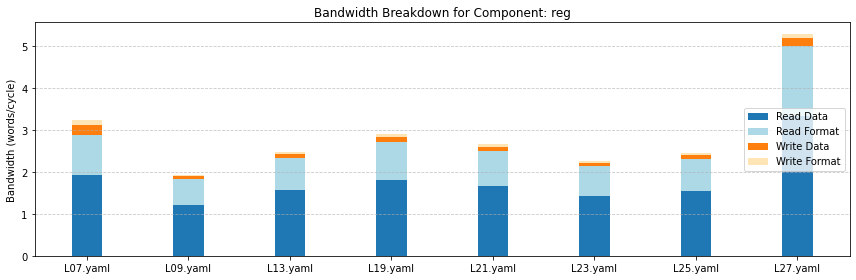

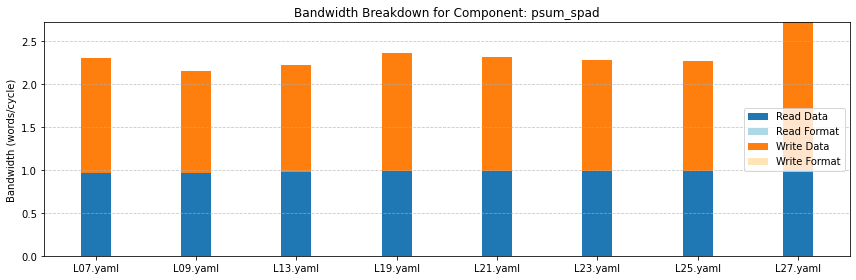

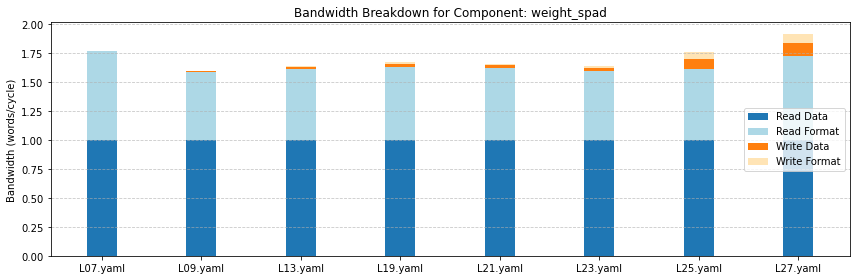

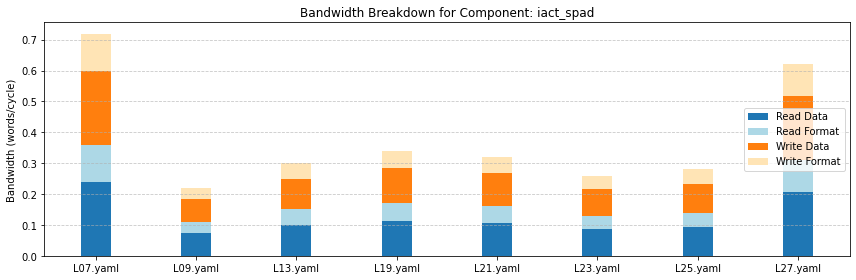

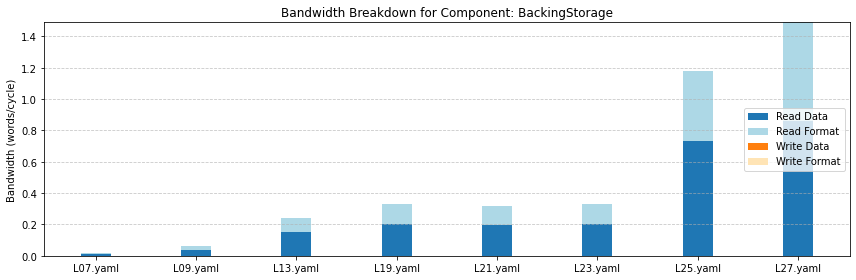

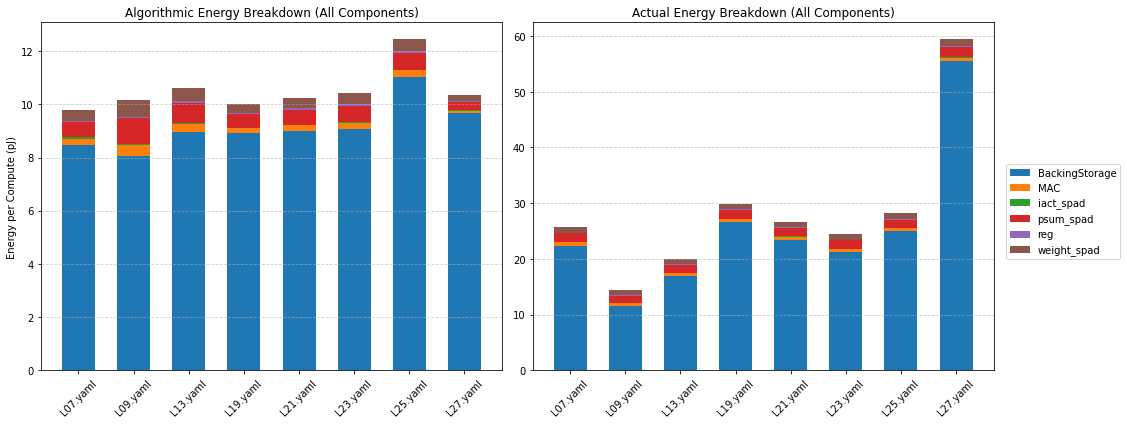

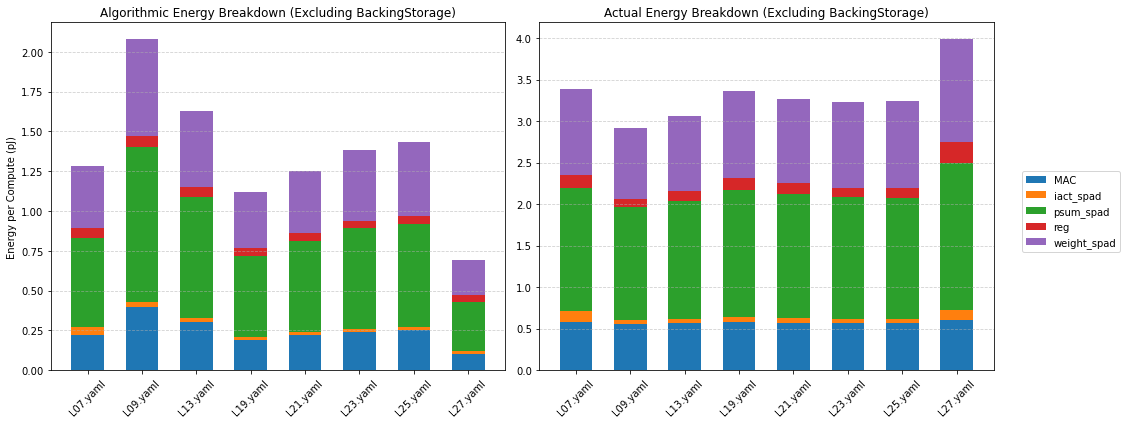

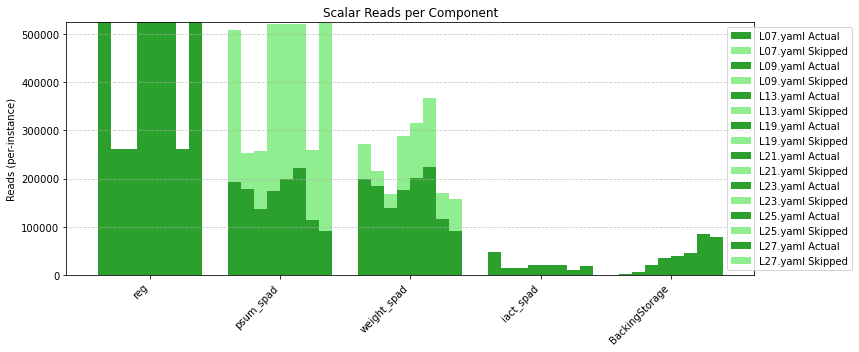

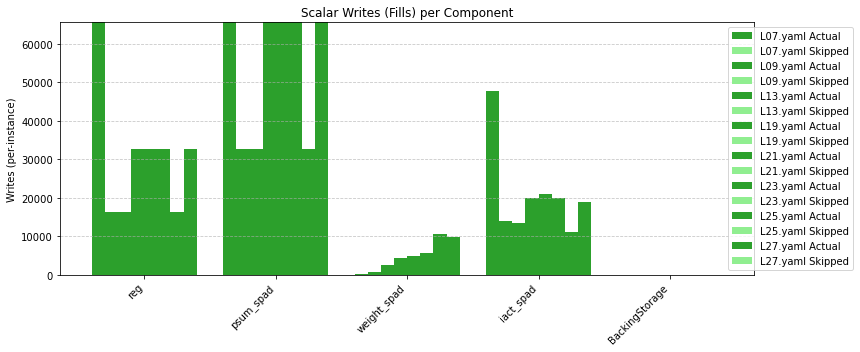

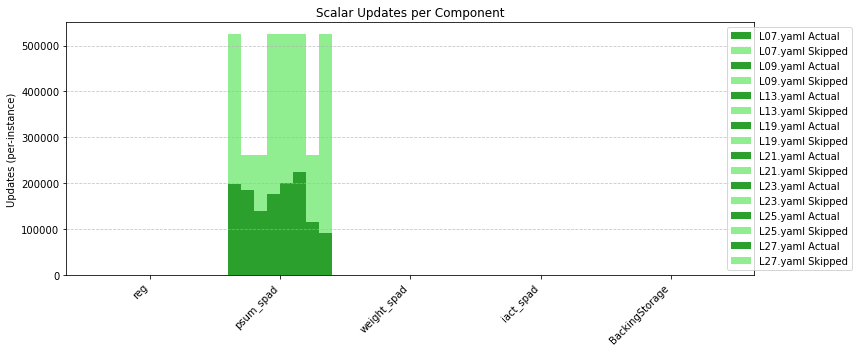

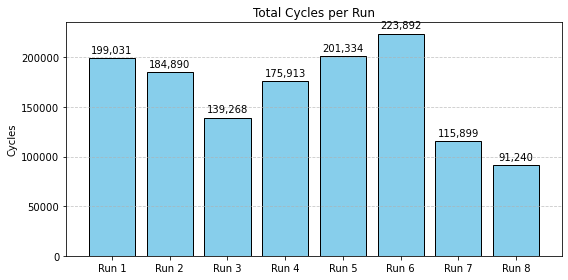

In [7]:
output_dir = os.getcwd()

run_timeloop(
    workloads       =   workload_file_array,
    mappings        =   mapping_file_array,
    config          =   eyerissv2_pe_config_file,
    pe_art          =   eyerissv2_pe_art_file,
    pe_ert          =   eyerissv2_pe_ert_file,
    arch            =   eyerissv2_pe_arch_file,
    output_dir      =   output_dir,
    experiment_name =   experiment_name
)


Utilization = 1.00 | pJ/Algorithmic-Compute =    5.184 | pJ/Compute =   13.655
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/searched-mapping/L07-timeloop-mapper.map.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =    6.984 | pJ/Compute =    9.902
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/mapping/searched-mapping/L09-timeloop-mapper.map.yaml /home

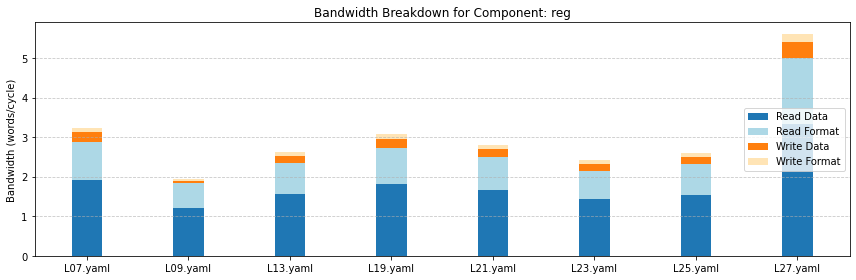

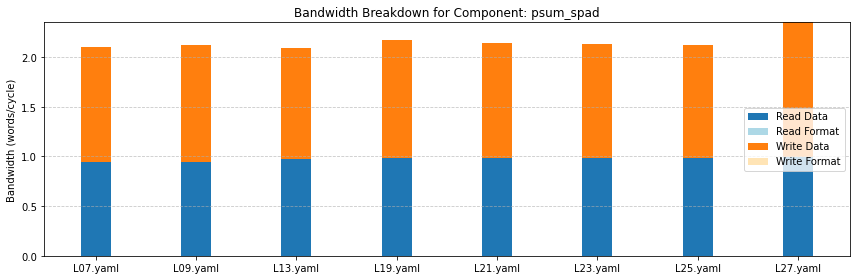

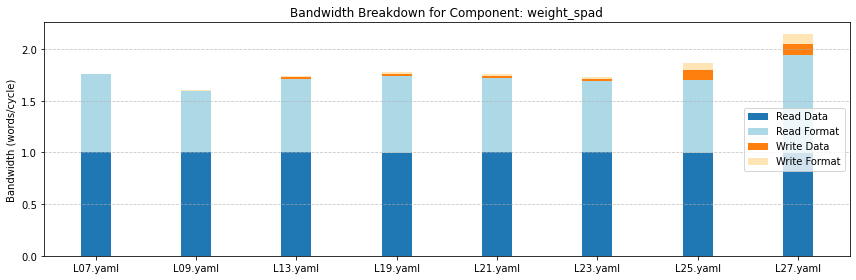

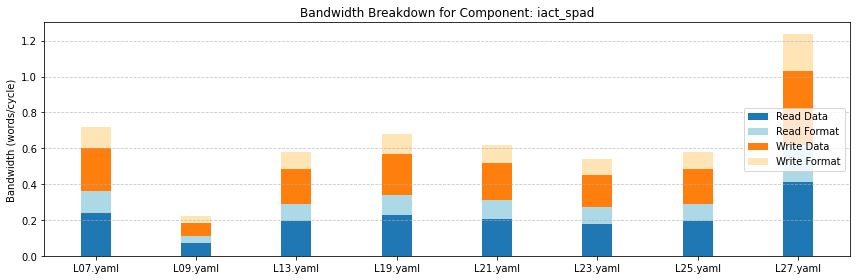

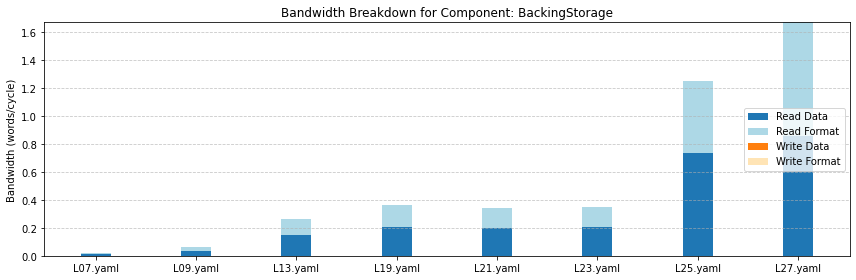

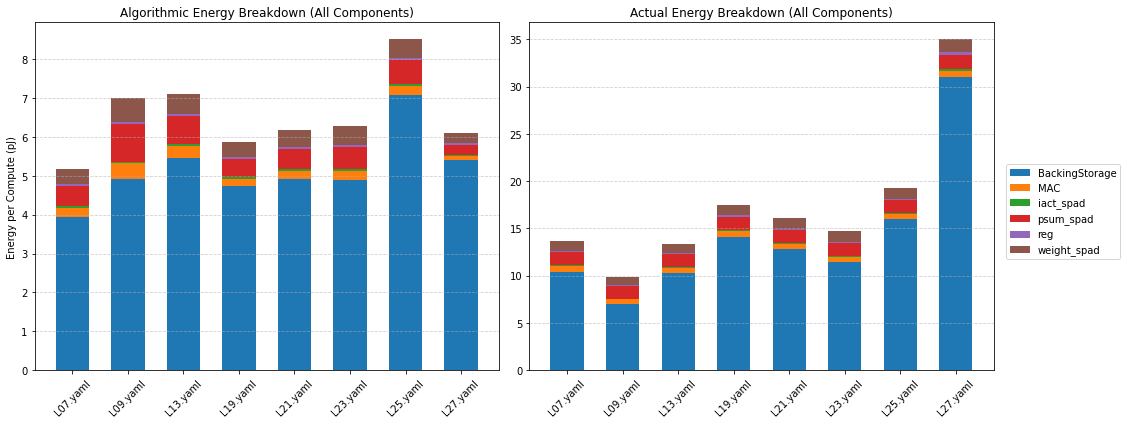

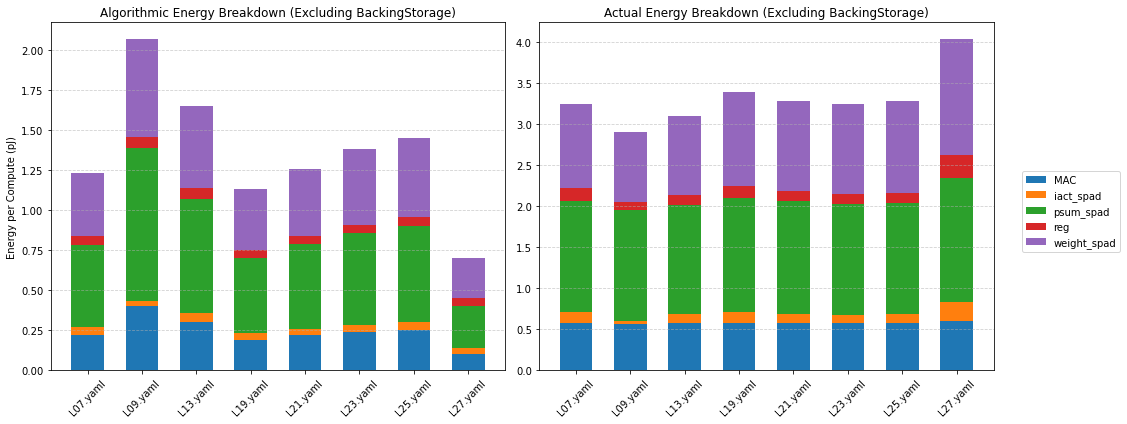

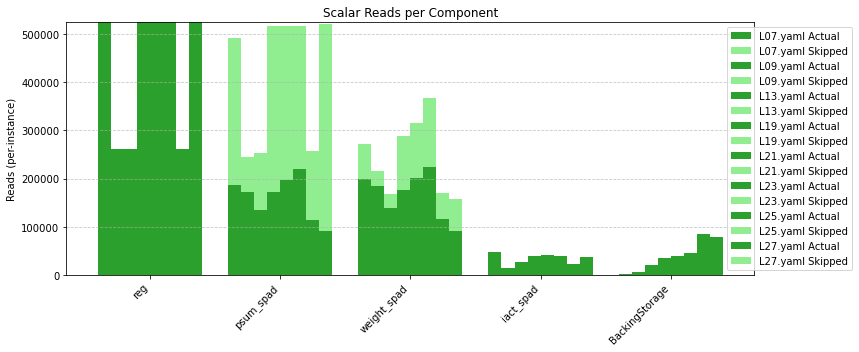

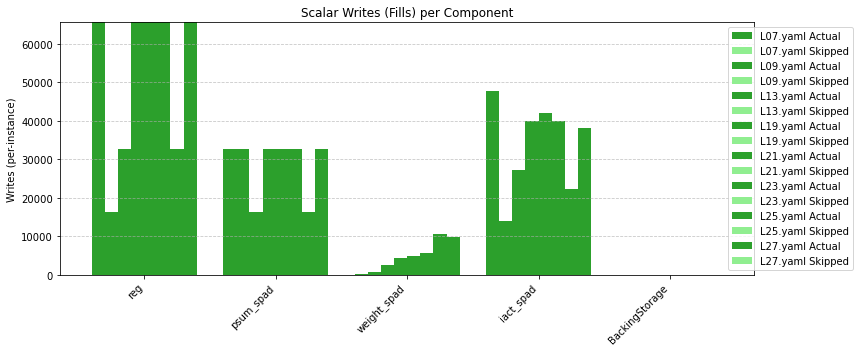

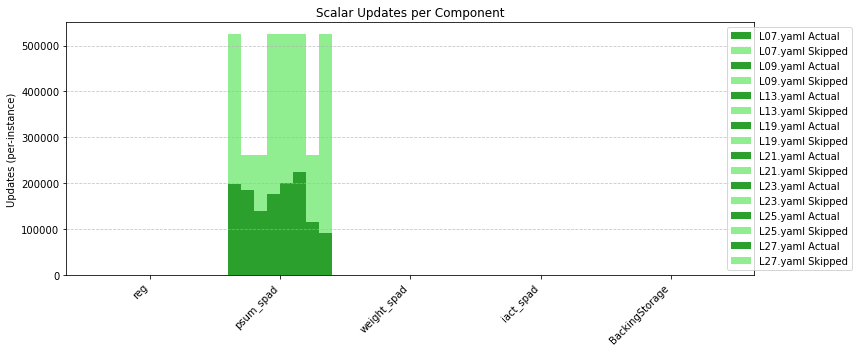

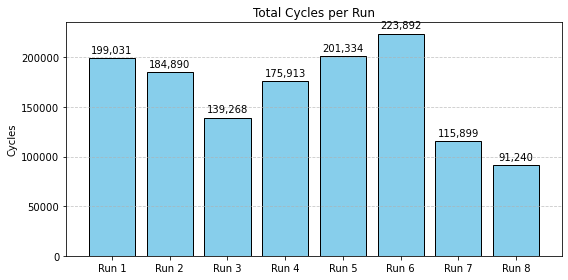

In [8]:
run_timeloop(
    workloads       =   workload_file_array,
    mappings        =   computed_mapping_file_array,
    config          =   eyerissv2_pe_config_file,
    pe_art          =   eyerissv2_pe_art_file,
    pe_ert          =   eyerissv2_pe_ert_file,
    arch            =   eyerissv2_pe_arch_file,
    output_dir      =   output_dir,
    experiment_name =   experiment_name
)


In [22]:
experiment_name = "2-by-4-PE-varying-sparsity"
mobilenet_sparse_dir = os.path.join(
    os.getcwd(),
    "workloads/mobilenet0.5-sparse/uniform-experiment"
)
mobilenet_sparse_mappings_dir = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapping/mapping-L07-sparsity/"
)
mobilenet_computed_sparse_mappings_dir = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapping/searched-mapping"
)


workload_file_array = get_all_files_in_dir(mobilenet_sparse_dir) 
mapping_file_array = get_all_files_in_dir(mobilenet_sparse_mappings_dir) * len(workload_file_array)
computed_mapping_file_array = get_all_files_in_dir(mobilenet_computed_sparse_mappings_dir)

for workload,mapping,computed_mapping in zip(workload_file_array,mapping_file_array,computed_mapping_file_array):
    print(workload,mapping,computed_mapping)
    print()
    
    

/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.1.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/searched-mapping/L07_sparse=0.1-timeloop-mapper.map.yaml

/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.2.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/searched-mapping/L07_sparse=0.2-timeloop-mapper.map.yaml

/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.3.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/w

In [10]:
mapper_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapper/mapper.yaml"
)
constraints_file = os.path.join(
    os.getcwd(),
    f"{experiment_name}/mapper/constraints.yaml"
)

for workload_file in workload_file_array:
    run_timeloop_mapper(
        arch    = eyerissv2_pe_arch_file,
        problem = workload_file, 
        mapper  = mapper_file,
        pe_art  = eyerissv2_pe_art_file,
        pe_ert  = eyerissv2_pe_ert_file,
        config  = eyerissv2_pe_config_file,
        constraints = constraints_file
    )
    workload_file_name = workload_file.strip().split('/')[-1].strip('.yaml')
    print(workload_file_name)
    mv_cmd_stat = ['mv','timeloop-mapper.stats.txt',f"{experiment_name}/mapping/searched-mapping/{workload_file_name}-timeloop-mapper.stats.txt"]
    print(' '.join(mv_cmd_stat))    
    status = subprocess.call(mv_cmd_stat) 
    mv_cmd_map = ['mv','timeloop-mapper.map.yaml',workload_file_name+'-timeloop-mapper.map.yaml']
    print(' '.join(mv_cmd_map))    
    status = subprocess.call(mv_cmd_map) 


  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture configuration complete.
Sparse optimization configuration complete.
Using all available hardware threads = 16
Mapper configuration complete.
Initializing Index Factorization subspace.
  Factorization options along problem dimension R = 1
  Factorization options along problem dimension S = 1
  Factorization options along problem dimension E = 1
  Factorization options along problem dimension F = 1
  Factorization options along problem dimension C = 462
  Factorization options along problem dimension M = 462
  Factorization options 

[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =   65.797 | pJ/Compute = 1265.197 | L4[WIO] C2 F32 E32 C4X - L3[I] C8 - L2[W] M8 - L1[O] G1 - L0[I] M8 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   32.412 | pJ/Compute =  623.242 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[  8] Utilization = 0.12 | pJ/Algorithmic-Compute =   31.687 | pJ/Compute =  609.312 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] G1 - L1[O] C4 - L0[I] M32 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   41.359 | pJ/Compute =  795.291 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   41.592 | pJ/Compute =  799.765 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Compute =   65.407 | pJ/Compute = 1257.706 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] G1 - L1[O] C2 - L0[I] M32 
[  7] Utilization = 1.00 | pJ/Algorithmic-Comp

[  2] Utilization = 1.00 | pJ/Algorithmic-Compute =   15.608 | pJ/Compute =  300.116 | L4[WIO] C8 F32 E32 C2Y M4X - L3[I] G1 - L2[W] C4 - L1[O] G1 - L0[I] M16 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   38.256 | pJ/Compute =  735.614 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] C4 - L2[W] C2 - L1[O] M4 - L0[I] G1 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute =   15.608 | pJ/Compute =  300.116 | L4[WIO] C8 F32 E32 C2Y M4X - L3[I] G1 - L2[W] C2 - L1[O] C2 - L0[I] M16 
[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   15.769 | pJ/Compute =  303.226 | L4[WIO] C8 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    4.326 | pJ/Compute =   83.178 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    4.203 | pJ/Compute =   80.819 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorith



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    1.802 | pJ/Compute =   34.652
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.1.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.1
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.1-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.1-timeloop-map

[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   41.690 | pJ/Compute =  400.827 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   32.949 | pJ/Compute =  316.783 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Compute =   65.740 | pJ/Compute =  632.048 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] G1 - L1[O] C2 - L0[I] M32 
[  8] Utilization = 0.12 | pJ/Algorithmic-Compute =   32.020 | pJ/Compute =  307.850 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] G1 - L1[O] C4 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   41.934 | pJ/Compute =  403.172 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.889 | pJ/Compute =  364.283 | L4[WIO] M2 C2 F32 E32 C2Y M4X - L3[I] M2 C4 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 15] Utilization = 0.12 | pJ/Algori

[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    5.270 | pJ/Compute =   50.672 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    5.141 | pJ/Compute =   49.425 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.428 | pJ/Compute =  340.618 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[ 13] Utilization = 0.25 | pJ/Algorithmic-Compute =    5.141 | pJ/Compute =   49.425 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.451 | pJ/Compute =  340.843 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   16.679 | pJ/Compute =  160.360 | L4[WIO] M4 C8 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C2 - L1[O] M8 - L0[I] G1 
[  7] Utilization = 0.50 | pJ/Algorithmi



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    2.339 | pJ/Compute =   22.487
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.2.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.2
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.2-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.2-timeloop-map

[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.025 | pJ/Compute =  423.217 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   42.021 | pJ/Compute =  269.352 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   33.485 | pJ/Compute =  214.640 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[ 10] Utilization = 0.12 | pJ/Algorithmic-Compute =   32.352 | pJ/Compute =  207.373 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] C2 - L1[O] C2 - L0[I] M32 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.072 | pJ/Compute =  423.516 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.276 | pJ/Compute =  270.987 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 11] Utilization = 0.12 | pJ/Algorithmic-Com

[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    6.078 | pJ/Compute =   38.961 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.660 | pJ/Compute =  228.577 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.031 | pJ/Compute =  230.958 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.660 | pJ/Compute =  228.577 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.683 | pJ/Compute =  228.726 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[ 13] Utilization = 0.25 | pJ/Algorithmic-Compute =    6.078 | pJ/Compute =   38.961 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  3] Utilization = 1.00 | pJ/Algorithmic-Com



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    2.876 | pJ/Compute =   18.433
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.3.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.3
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.3-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.3-timeloop-map

[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   34.022 | pJ/Compute =  163.558 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[ 11] Utilization = 0.12 | pJ/Algorithmic-Compute =   32.684 | pJ/Compute =  157.125 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] C4 - L1[O] G1 - L0[I] M32 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   42.352 | pJ/Compute =  203.602 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.618 | pJ/Compute =  204.882 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.357 | pJ/Compute =  319.005 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 10] Utilization = 0.12 | pJ/Algorithmic-Compute =   32.684 | pJ/Compute =  157.125 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] C2 - L1[O] C2 - L0[I] M32 
[  9] Utilization = 0.50 | pJ/Algorithmic-Com

[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    7.160 | pJ/Compute =   34.419 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    7.016 | pJ/Compute =   33.728 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.892 | pJ/Compute =  172.545 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.366 | pJ/Compute =  174.827 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.892 | pJ/Compute =  172.545 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.915 | pJ/Compute =  172.658 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[ 13] Utilization = 0.25 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    3.412 | pJ/Compute =   16.405
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.4.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.4
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.4-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.4-timeloop-map

[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   42.683 | pJ/Compute =  164.158 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.736 | pJ/Compute =  256.667 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] G1 - L1[O] C2 - L0[I] M32 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.689 | pJ/Compute =  256.487 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   66.736 | pJ/Compute =  256.667 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   42.960 | pJ/Compute =  165.225 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   34.559 | pJ/Compute =  132.914 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[ 11] Utilization = 0.12 | pJ/Algorithmic-Com

[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   16.693 | pJ/Compute =   64.200 | L4[WIO] C8 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    8.104 | pJ/Compute =   31.169 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    7.954 | pJ/Compute =   30.589 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.124 | pJ/Compute =  138.931 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.701 | pJ/Compute =  141.153 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.124 | pJ/Compute =  138.931 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[ 14] Utilization = 1.00 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    3.949 | pJ/Compute =   15.188
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.5.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.5
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.5-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.5-timeloop-map

[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   43.302 | pJ/Compute =  138.782 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   43.014 | pJ/Compute =  137.857 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  8] Utilization = 0.12 | pJ/Algorithmic-Compute =   33.348 | pJ/Compute =  106.880 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] G1 - L1[O] C4 - L0[I] M32 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =   66.946 | pJ/Compute =  214.561 | L4[WIO] C2 F32 E32 C4X - L3[I] C8 - L2[W] M8 - L1[O] G1 - L0[I] M8 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.068 | pJ/Compute =  214.952 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  9] Utilization = 0.50 | pJ/Algorithmic-Compute =   42.458 | pJ/Compute =  136.076 | L4[WIO] C4 F32 E32 C4X - L3[I] M2 C2 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  1] Utilization = 1.00 | pJ/Algorithmic-Compute 

[ 15] Utilization = 1.00 | pJ/Algorithmic-Compute =   16.924 | pJ/Compute =   54.240 | L4[WIO] C8 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C2 - L1[O] M2 - L0[I] M16 
[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    9.049 | pJ/Compute =   29.002 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    8.891 | pJ/Compute =   28.496 | L4[WIO] M8 C2 F32 E32 C2Y - L3[I] G1 - L2[W] C8 - L1[O] C2 - L0[I] M8 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.356 | pJ/Compute =  116.519 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.036 | pJ/Compute =  118.700 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.356 | pJ/Compute =  116.519 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[ 14] Utilization = 1.00 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    4.486 | pJ/Compute =   14.377
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.6.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.6
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.6-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.6-timeloop-map

[ 12] Utilization = 1.00 | pJ/Algorithmic-Compute =   35.632 | pJ/Compute =   97.886 | L4[WIO] M4 C16 F32 E32 M2Y C4X - L3[I] G1 - L2[W] M2 - L1[O] M4 - L0[I] G1 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.354 | pJ/Compute =  185.027 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.400 | pJ/Compute =  185.156 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   43.644 | pJ/Compute =  119.895 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.400 | pJ/Compute =  185.156 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] G1 - L1[O] C2 - L0[I] M32 
[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   43.344 | pJ/Compute =  119.071 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 10] Utilization = 0.12 | pJ/Algorithmic-Com

[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =    9.994 | pJ/Compute =   27.454 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.588 | pJ/Compute =  100.510 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.371 | pJ/Compute =  102.662 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.588 | pJ/Compute =  100.510 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.154 | pJ/Compute =  102.066 | L4[WIO] F32 E32 M2Y C4X - L3[I] M16 - L2[W] C16 - L1[O] M2 - L0[I] G1 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.611 | pJ/Compute =  100.574 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    5.023 | pJ/Compute =   13.798
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.7.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.7
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.7-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.7-timeloop-map

[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   43.675 | pJ/Compute =  104.984 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.733 | pJ/Compute =  162.812 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  2] Utilization = 0.50 | pJ/Algorithmic-Compute =   67.406 | pJ/Compute =  162.027 | L4[WIO] C2 F32 E32 C4X - L3[I] C8 - L2[W] M8 - L1[O] G1 - L0[I] M8 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   67.686 | pJ/Compute =  162.700 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[  7] Utilization = 1.00 | pJ/Algorithmic-Compute =   39.941 | pJ/Compute =   96.009 | L4[WIO] M2 C2 F32 E32 C2Y M4X - L3[I] M2 C4 - L2[W] C4 - L1[O] G1 - L0[I] M4 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   43.986 | pJ/Compute =  105.732 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Co

[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =   10.938 | pJ/Compute =   26.293 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.819 | pJ/Compute =   88.504 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.706 | pJ/Compute =   90.636 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.819 | pJ/Compute =   88.504 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.401 | pJ/Compute =   89.904 | L4[WIO] F32 E32 M2Y C4X - L3[I] M16 - L2[W] C16 - L1[O] M2 - L0[I] G1 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   36.843 | pJ/Compute =   88.561 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    5.559 | pJ/Compute =   13.363
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.8.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.8
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.8-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.8-timeloop-map

[  0] Utilization = 0.50 | pJ/Algorithmic-Compute =   44.006 | pJ/Compute =   94.026 | L4[WIO] M2 C4 F32 E32 C4X - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 15] Utilization = 0.12 | pJ/Algorithmic-Compute =   68.018 | pJ/Compute =  145.331 | L4[WIO] M2 C16 F32 E32 - L3[I] C4 - L2[W] G1 - L1[O] G1 - L0[I] M32 
[ 13] Utilization = 0.12 | pJ/Algorithmic-Compute =   68.065 | pJ/Compute =  145.430 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] G1 - L1[O] C2 - L0[I] M32 
[ 14] Utilization = 0.12 | pJ/Algorithmic-Compute =   68.065 | pJ/Compute =  145.430 | L4[WIO] M2 C16 F32 E32 - L3[I] C2 - L2[W] C2 - L1[O] G1 - L0[I] M32 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   44.328 | pJ/Compute =   94.714 | L4[WIO] M2 C4 F32 E32 C2Y M4X - L3[I] M2 C2 - L2[W] G1 - L1[O] C4 - L0[I] M4 
[ 11] Utilization = 0.12 | pJ/Algorithmic-Compute =   34.345 | pJ/Compute =   73.383 | L4[WIO] M2 C16 F32 E32 - L3[I] G1 - L2[W] C4 - L1[O] G1 - L0[I] M32 
[  5] Utilization = 0.50 | pJ/Algorithmic-Compute = 

[  6] Utilization = 1.00 | pJ/Algorithmic-Compute =   11.883 | pJ/Compute =   25.390 | L4[WIO] M8 C2 F32 E32 M2Y C4X - L3[I] G1 - L2[W] C8 - L1[O] M4 - L0[I] G1 
[  4] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.051 | pJ/Compute =   79.166 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C4 - L1[O] C2 - L0[I] M16 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   38.041 | pJ/Compute =   81.281 | L4[WIO] M2 F32 E32 M2Y C4X - L3[I] M2 - L2[W] C2 - L1[O] C8 - L0[I] M8 
[  5] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.051 | pJ/Compute =   79.166 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C2 - L2[W] C8 - L1[O] G1 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.649 | pJ/Compute =   80.442 | L4[WIO] F32 E32 M2Y C4X - L3[I] M16 - L2[W] C16 - L1[O] M2 - L0[I] G1 
[ 14] Utilization = 1.00 | pJ/Algorithmic-Compute =   37.075 | pJ/Compute =   79.216 | L4[WIO] F32 E32 M2Y C4X - L3[I] M2 C8 - L2[W] G1 - L1[O] C2 - L0[I] M16 
[  3] Utilization = 1.00 | pJ/Algorithmic



Summary stats for best mapping found by mapper:
  Utilization = 1.00 | pJ/Algorithmic-Compute =    6.096 | pJ/Compute =   13.026
TIMELOOP-MAPPER COMMAND:  timeloop-mapper /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.9.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/mapper.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapper/constraints.yaml
L07_sparse=0.9
mv timeloop-mapper.stats.txt 2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.9-timeloop-mapper.stats.txt
mv timeloop-mapper.map.yaml L07_sparse=0.9-timeloop-map

[ 13] STATEMENT: 500 suboptimal mappings found since the last upgrade, terminating search.
mv: cannot move 'timeloop-mapper.stats.txt' to '2-by-4-PE-varying-sparsity/mapping/searched-mappings/L07_sparse=0.9-timeloop-mapper.stats.txt': No such file or directory


Utilization = 1.00 | pJ/Algorithmic-Compute =    7.652 | pJ/Compute =  147.132
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.1.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =    7.989 | pJ/Compute =   76.812
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.2.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapp

Utilization = 1.00 | pJ/Algorithmic-Compute =    8.327 | pJ/Compute =   53.375
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.3.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =    8.665 | pJ/Compute =   41.654
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.4.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapp

Utilization = 1.00 | pJ/Algorithmic-Compute =    9.002 | pJ/Compute =   34.622
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.5.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =    9.340 | pJ/Compute =   29.934
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.6.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapp

Utilization = 1.00 | pJ/Algorithmic-Compute =    9.677 | pJ/Compute =   26.585
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.7.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   10.015 | pJ/Compute =   24.074
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.8.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapp

Utilization = 1.00 | pJ/Algorithmic-Compute =   10.353 | pJ/Compute =   22.120
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.9.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/mapping-L07-sparsity/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml


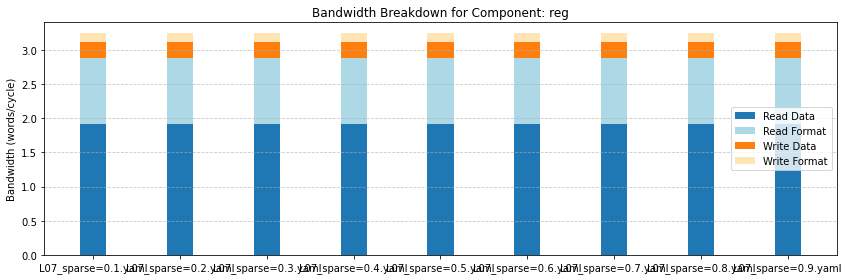

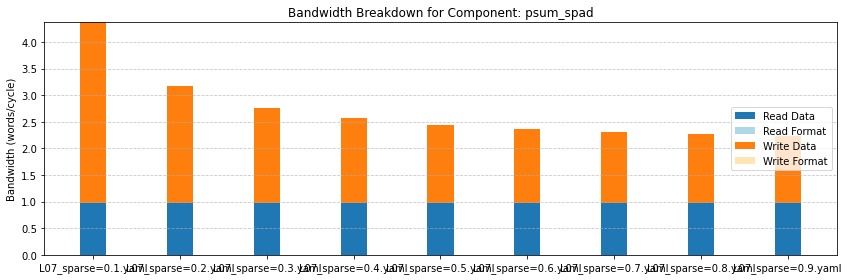

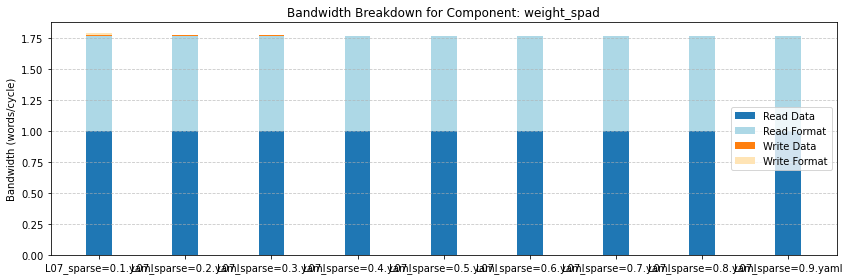

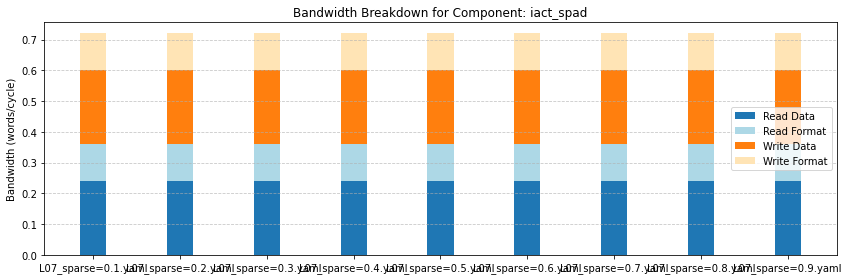

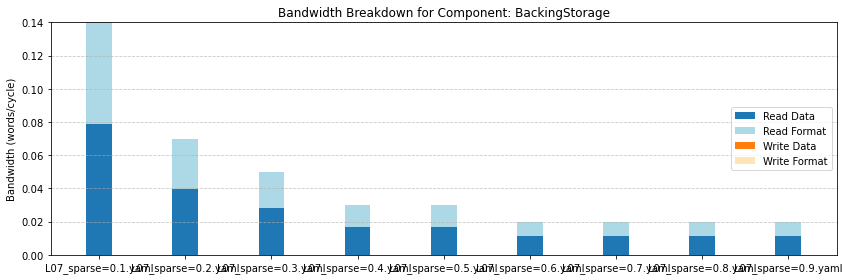

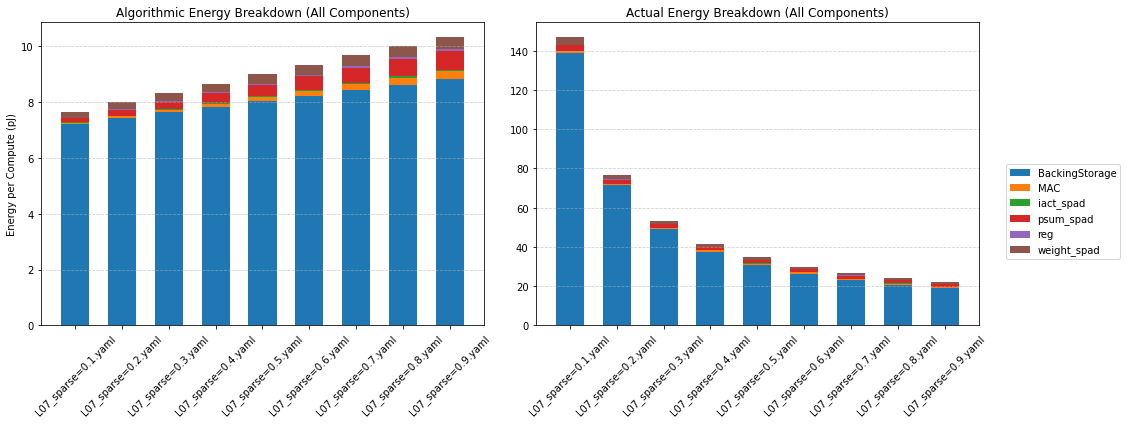

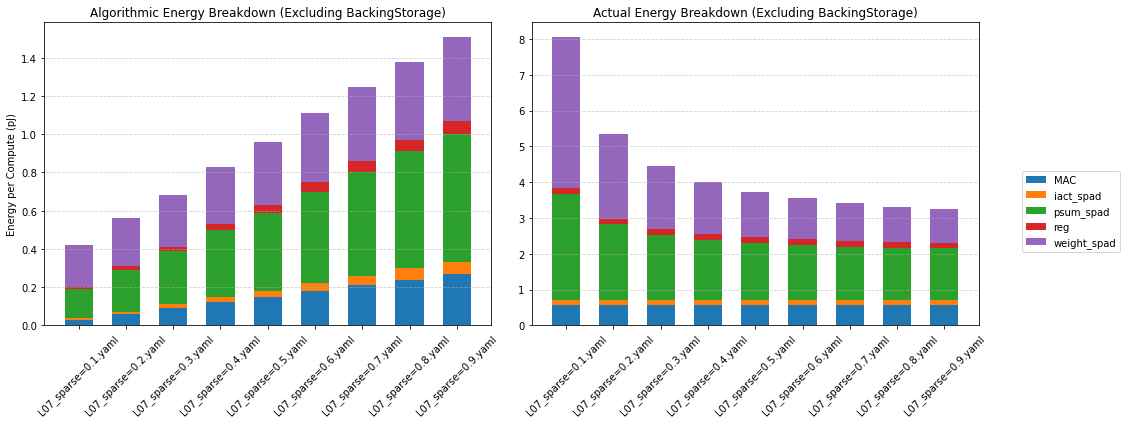

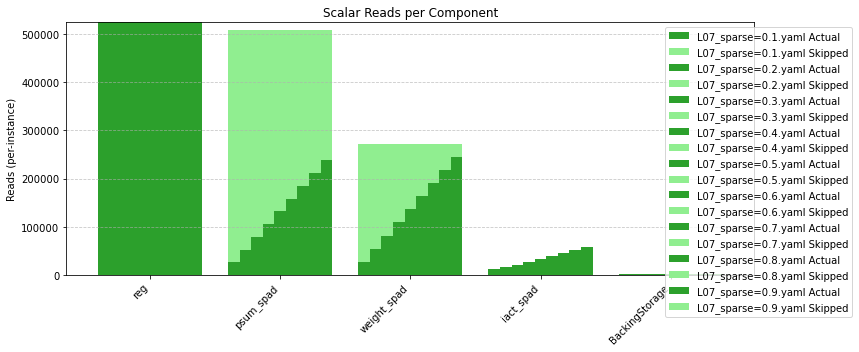

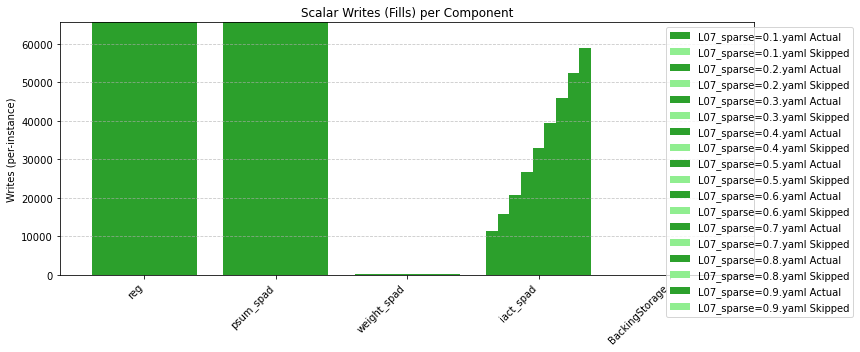

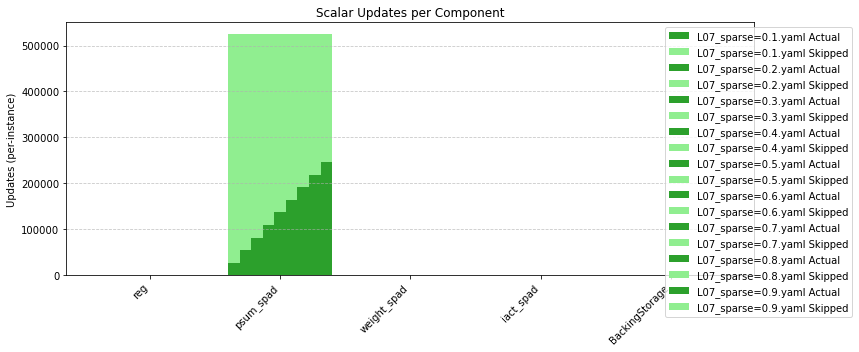

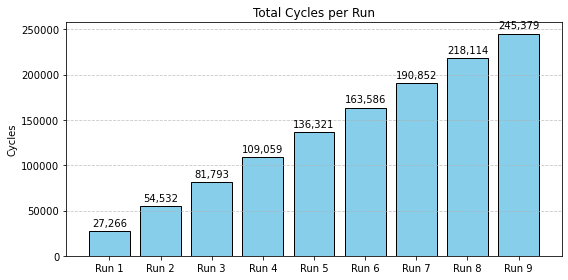

In [23]:
# output_dir = os.path.join(os.getcwd(),'/debug')
run_timeloop(
    workloads       =   workload_file_array,
    mappings        =   mapping_file_array,
    config          =   eyerissv2_pe_config_file,
    pe_art          =   eyerissv2_pe_art_file,
    pe_ert          =   eyerissv2_pe_ert_file,
    arch            =   eyerissv2_pe_arch_file,
    output_dir      =   output_dir,
    experiment_name =   experiment_name
)


Utilization = 1.00 | pJ/Algorithmic-Compute =    1.802 | pJ/Compute =   34.652
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.1.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-sparsity/mapping/searched-mapping/L07_sparse=0.1-timeloop-mapper.map.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =    2.339 | pJ/Compute =   22.487
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform-experiment/L07_sparse=0.2.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-varying-s

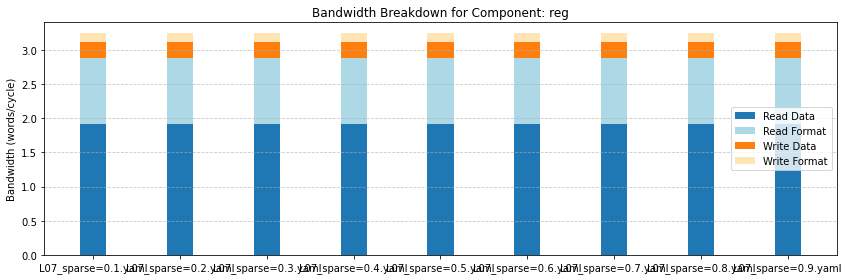

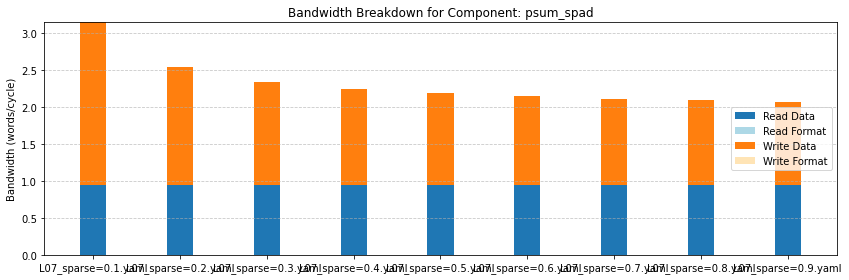

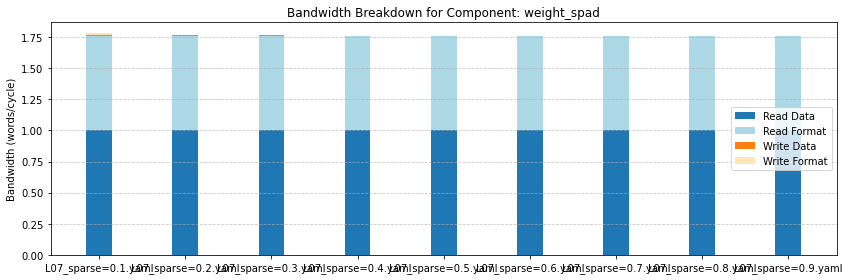

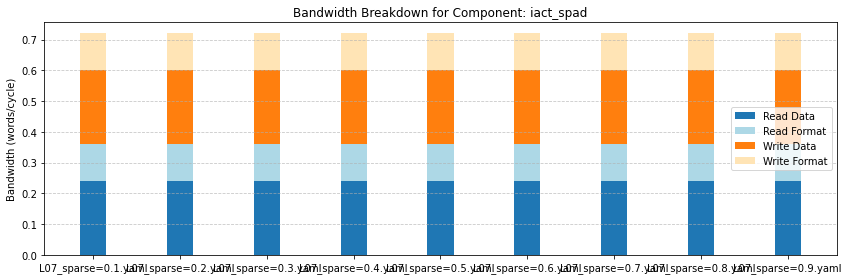

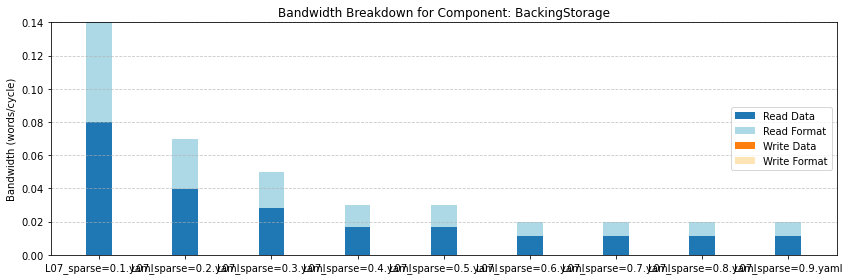

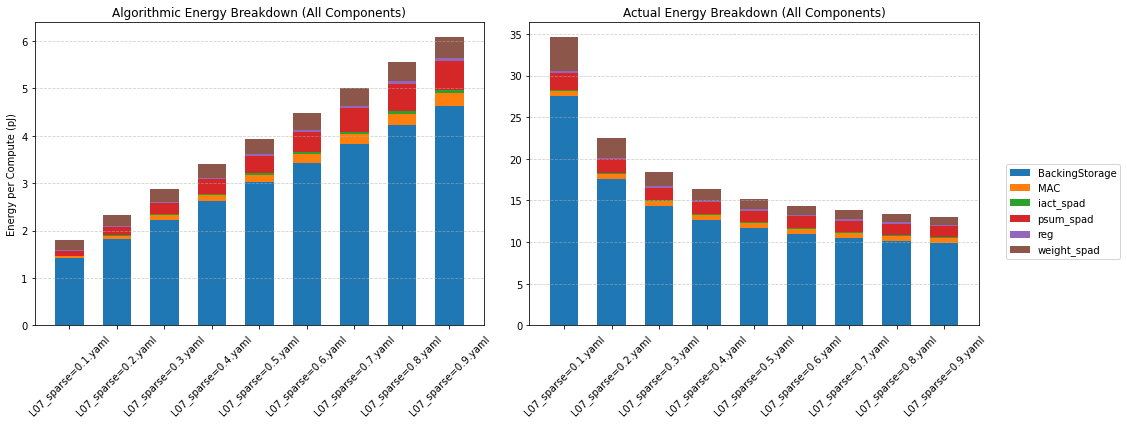

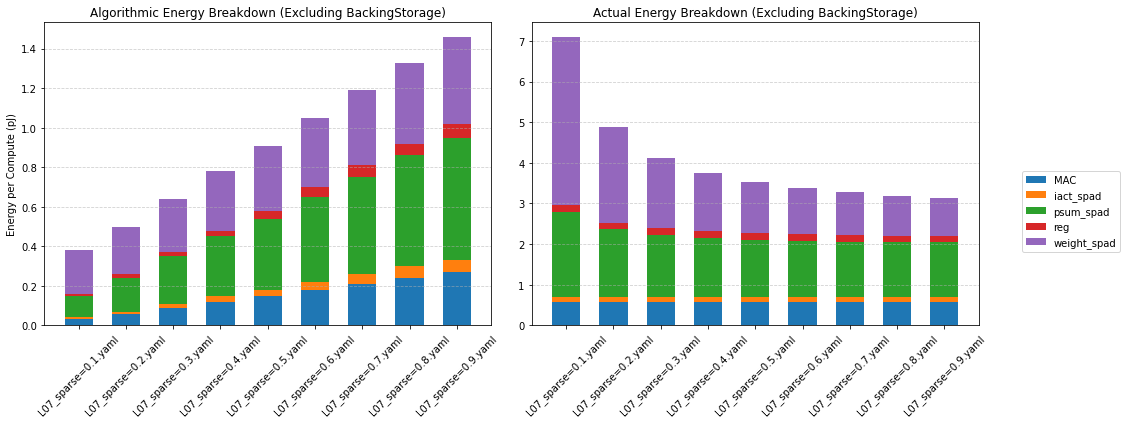

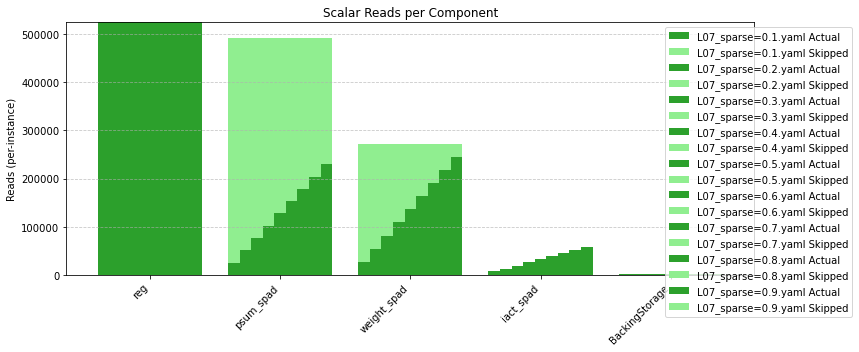

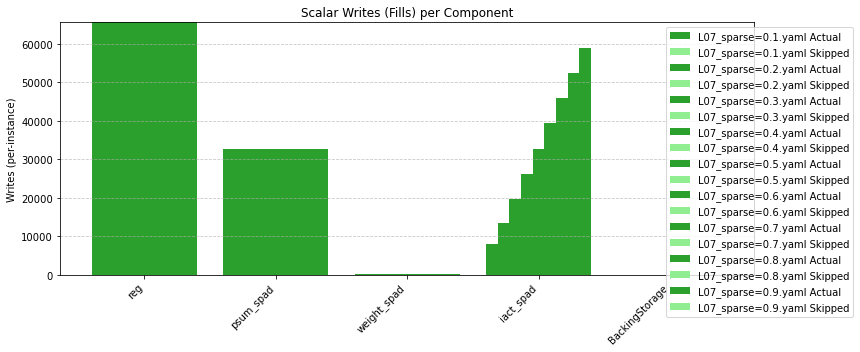

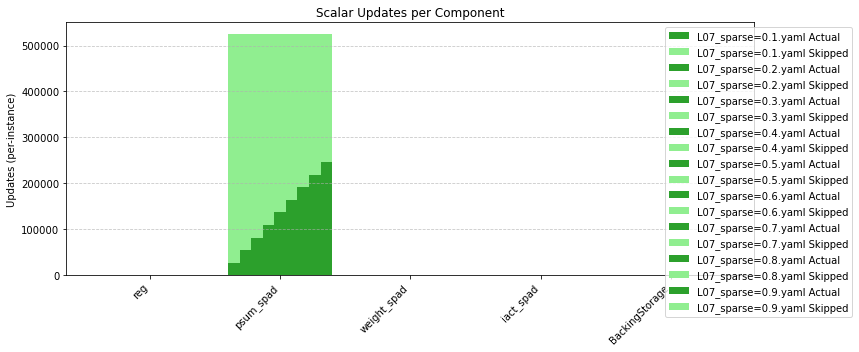

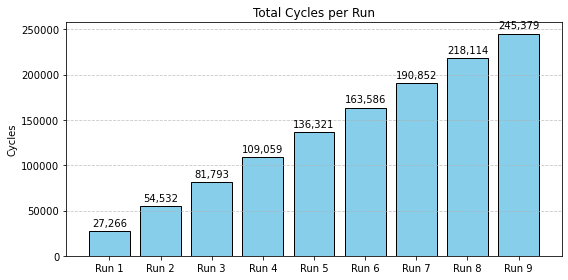

In [24]:
# output_dir = os.path.join(os.getcwd(),'/debug')
run_timeloop(
    workloads       =   workload_file_array,
    mappings        =   computed_mapping_file_array,
    config          =   eyerissv2_pe_config_file,
    pe_art          =   eyerissv2_pe_art_file,
    pe_ert          =   eyerissv2_pe_ert_file,
    arch            =   eyerissv2_pe_arch_file,
    output_dir      =   output_dir,
    experiment_name =   experiment_name
)


In [13]:
# experiment_name = "original-eyerissv2-PE"

# eyerissv2_pe_config_file = os.path.join(
#     os.getcwd(),
#     f"{experiment_name}/design/SI-SW.yaml"
# )

# eyerissv2_pe_arch_file = os.path.join(
#     os.getcwd(),
#     f"{experiment_name}/design/arch.yaml"
# )
# eyerissv2_pe_component_file = os.path.join(
#     os.getcwd(),
#     f"{experiment_name}/design/compound_components.yaml"
# )
# mobilenet_sparse_dir = os.path.join(
#     os.getcwd(),
#     'workloads/mobilenet0.5-sparse/uniform'
# )
# mobilenet_sparse_mappings_dir = os.path.join(
#     os.getcwd(),
#     f"{experiment_name}/mappings/mobilenet0.5-sparse"
# )


# workload_file_array = get_all_files_in_dir(mobilenet_sparse_dir)
# mapping_file_array = get_all_files_in_dir(mobilenet_sparse_mappings_dir)

# print(workload_file_array)
# print(mapping_file_array)

['/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L13.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L19.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L21.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L23.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L25.yaml', '/home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L27.yaml']
['/home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L07-perfect_factor.yaml', '/home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L09-perfect_factor

Utilization = 1.00 | pJ/Algorithmic-Compute =   22.162 | pJ/Compute =   58.379
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L07.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L07-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   20.722 | pJ/Compute =   29.381
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L09.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L09-perfect_factor.yaml /ho

Utilization = 1.00 | pJ/Algorithmic-Compute =   21.093 | pJ/Compute =   39.704
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L13.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L13-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/arch.yaml


Utilization = 1.00 | pJ/Algorithmic-Compute =   19.866 | pJ/Compute =   59.207
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L19.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L19-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/arch.yaml


Utilization = 1.00 | pJ/Algorithmic-Compute =   20.165 | pJ/Compute =   52.512
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L21.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L21-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/arch.yaml


Utilization = 1.00 | pJ/Algorithmic-Compute =   20.267 | pJ/Compute =   47.460
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L23.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L23-perfect_factor.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/SI-SW.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ART.yaml /home/workspace/2022.micro.artifact/notebook/2-by-4-PE-experiment/ert_art/ERT.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/design/arch.yaml
Utilization = 1.00 | pJ/Algorithmic-Compute =   22.507 | pJ/Compute =   50.908
TIMELOOP-MODEL COMMAND:  timeloop-model /home/workspace/2022.micro.artifact/notebook/workloads/mobilenet0.5-sparse/uniform/L25.yaml /home/workspace/2022.micro.artifact/notebook/original-eyerissv2-PE/mappings/mobilenet0.5-sparse/L25-perfect_factor.yaml /ho

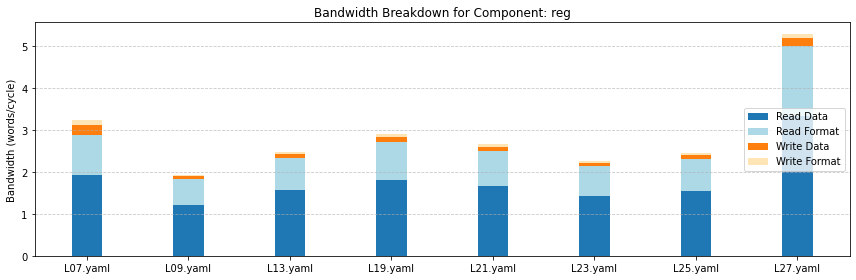

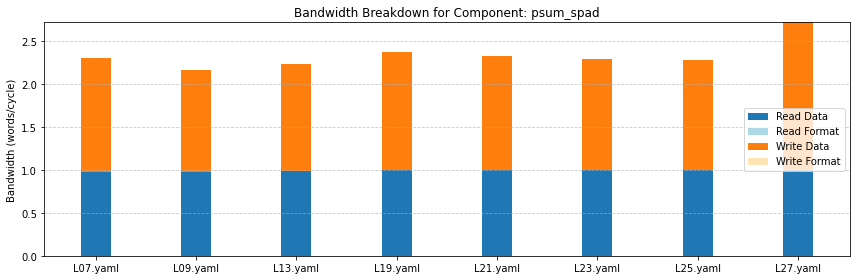

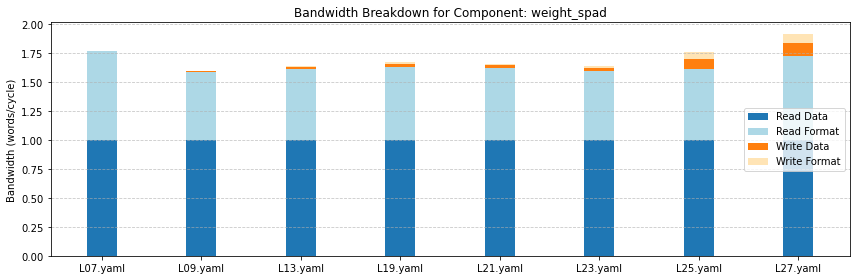

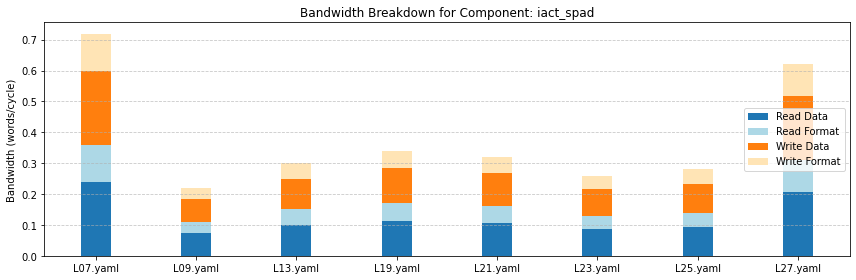

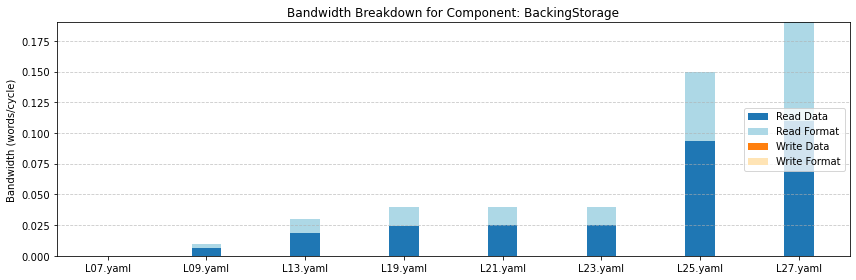

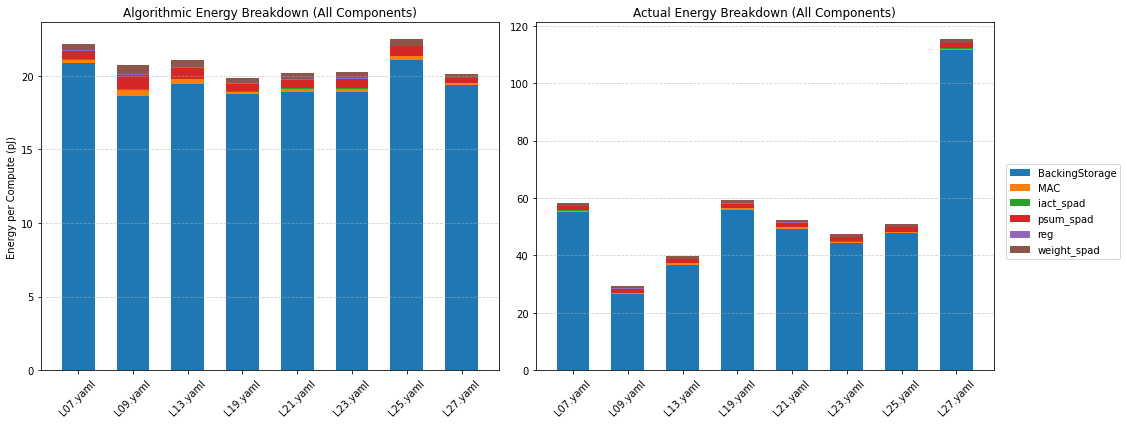

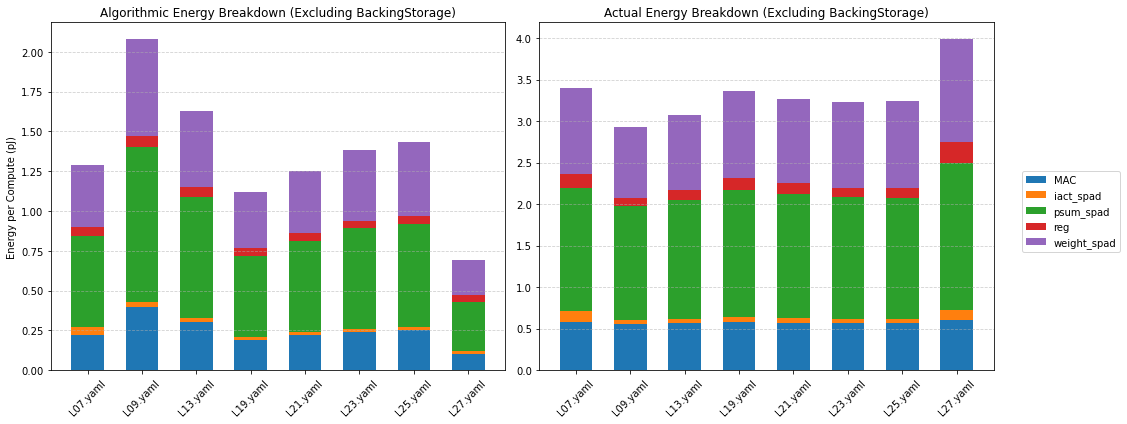

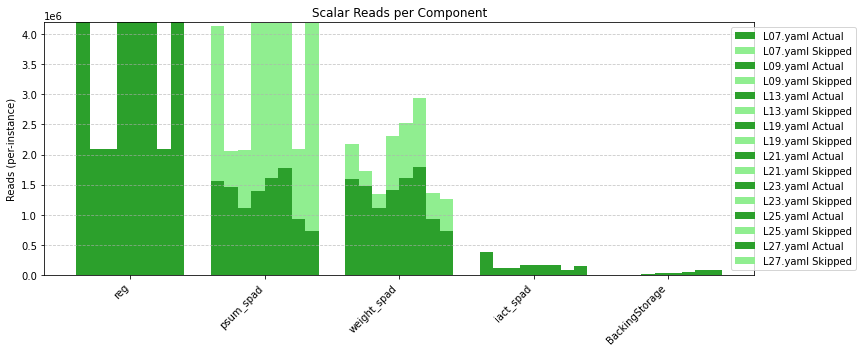

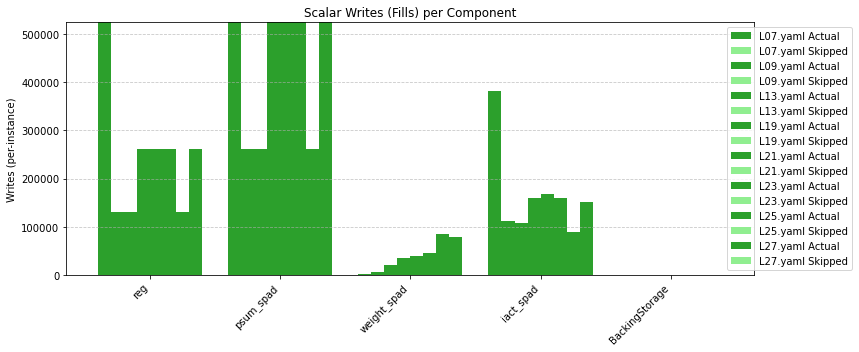

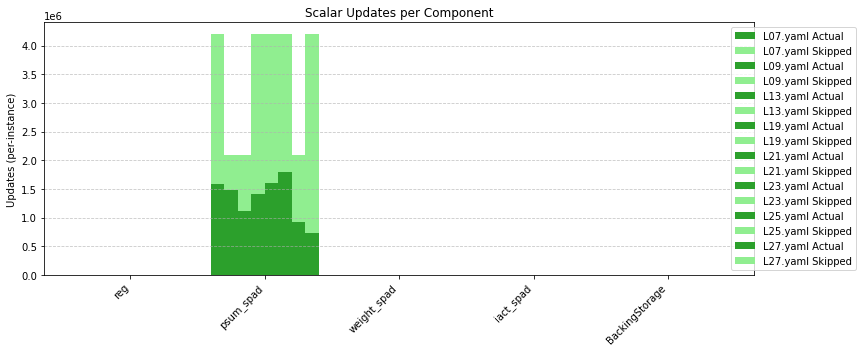

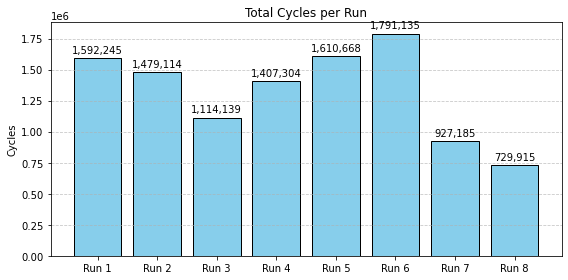

In [14]:
# run_timeloop(
#     workloads       =   workload_file_array,
#     mappings        =   mapping_file_array,
#     config          =   eyerissv2_pe_config_file,
#     pe_art          =   eyerissv2_pe_art_file,
#     pe_ert          =   eyerissv2_pe_ert_file,
#     arch            =   eyerissv2_pe_arch_file,
#     output_dir      =   output_dir,
#     experiment_name =   experiment_name
# )
